In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")

In [27]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [28]:
df.shape

(1462, 5)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [30]:
df.describe(include=object)

,date
count,1462
unique,1462
top,2016-03-12
freq,1


In [31]:
df.describe(include=float)

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [32]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [33]:
df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

# Mean Temperature in Delhi Over the Years

In [35]:
# plt.figure(figsize=(15,4))
# x=df['date']
# y=df['meantemp']
# plt.plot(x,y)
# plt.xlabel("date")
# plt.ylabel("mean Temp")
# plt.title("'Mean Temperature in Delhi Over the Years'")
# plt.show()

In [36]:
# sns.relplot(df['date'],df['meantemp'], kind="line")

# Humidity in Delhi Over the Years

In [37]:
# plt.figure(figsize=(15,14))

# sns.relplot(df['date'],df['humidity'], kind="line", color="red")

# The wind speed in Delhi over the years

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'The wind speed in Delhi over the years'}, xlabel='date', ylabel='wind_speed'>

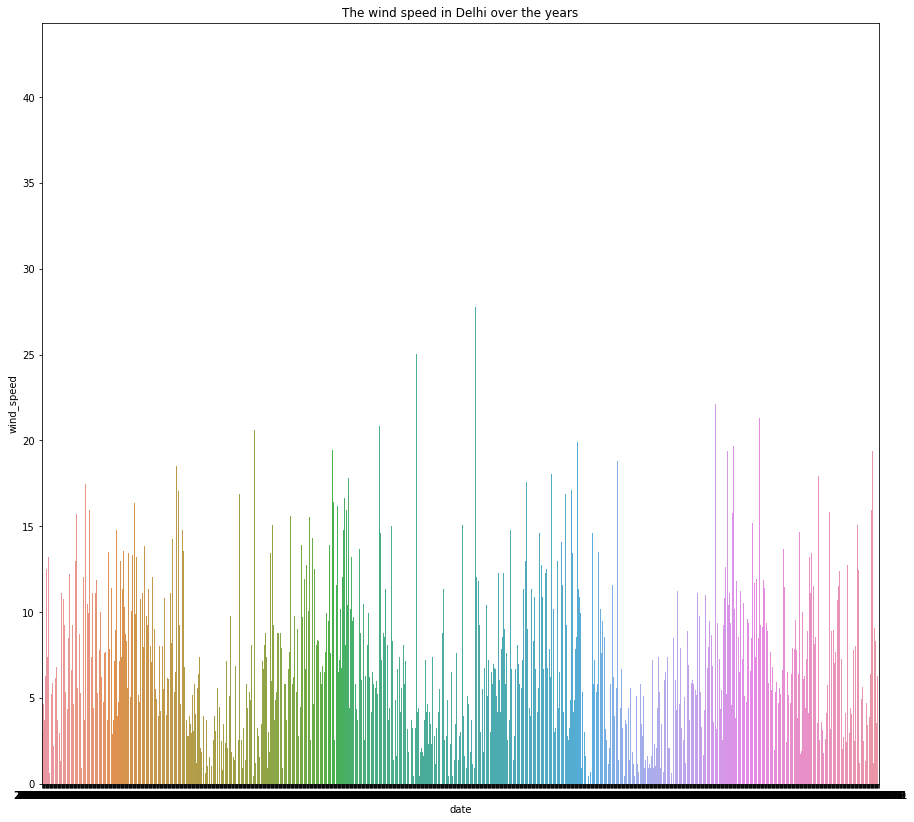

In [78]:
plt.figure(figsize=(15,14))
plt.title("The wind speed in Delhi over the years")
sns.barplot(df['date'],df['wind_speed'])

# Now let’s have a look at the relationship between temperature and humidity:

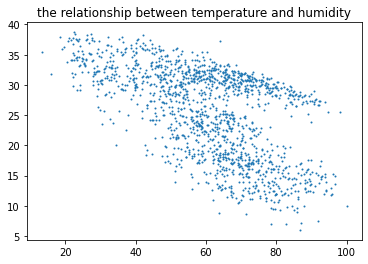

In [79]:
plt.title('the relationship between temperature and humidity')
plt.scatter(df['humidity'], df['meantemp'],1)

# Analyzing Temperature Change

In [80]:
df['date']=pd.to_datetime(df['date'],format = '%Y-%m-%d')
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

In [81]:
df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure', 'month',
       'year'],
      dtype='object')

In [82]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,month,year
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


# temperature change in Delhi over the years:

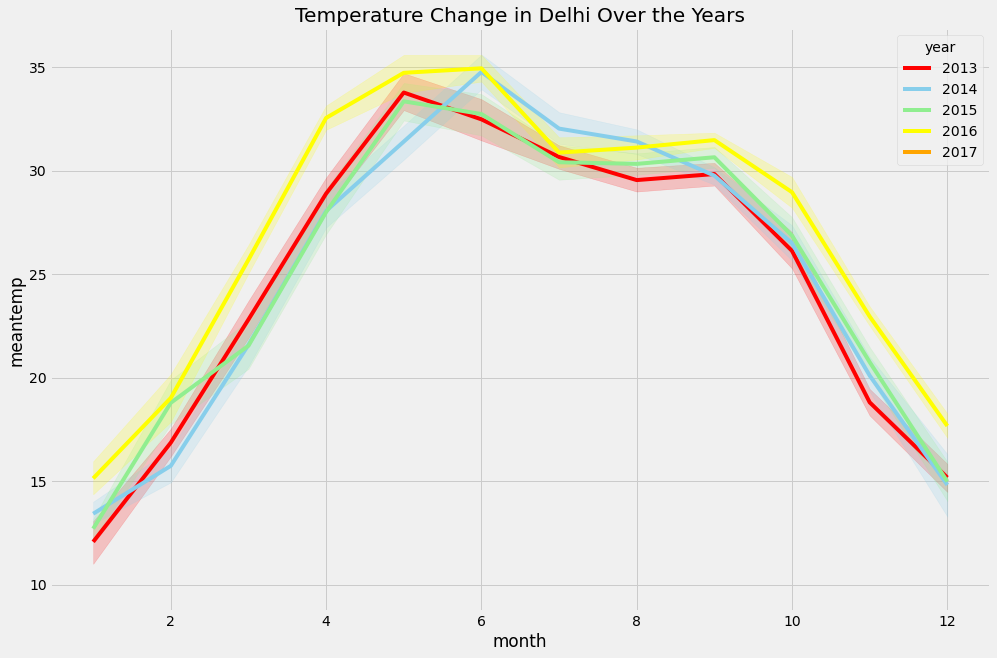

In [89]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = df, x='month', y='meantemp', hue='year', palette=['red', 'skyblue', 'lightgreen','yellow', 'orange'])
plt.show()

# Forecasting Weather using Python

In [94]:
forecast = df.rename(columns = {"date": "ds", "meantemp": "y"})
print(forecast)

             ds          y    humidity  wind_speed  meanpressure  month  year
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667      1  2013
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000      1  2013
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667      1  2013
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667      1  2013
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000      1  2013
...         ...        ...         ...         ...           ...    ...   ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217     12  2016
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762     12  2016
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762     12  2016
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000     12  2016
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000      1  2017

[1462 rows x 7 columns]


# use the Facebook prophet model for weather forecasting using Python

In [97]:
# from prophet import Prophet
# from prophet.plot import plot_plotly, plot_components_plotly
# model = Prophet()
# model.fit(forecast)
# forecasts = model.make_future_dataframe(periods=365)
# predictions = model.predict(forecasts)
# plot_plotly(model, predictions)